<a href="https://colab.research.google.com/github/Humphrey254/salesAnalysis/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('/content/Online Retail Data Set.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
import pandas as pd

df = pd.read_excel('/content/Online Retail Data Set.xlsx')
df.head()

# Get a list of numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply the comparison only to numeric columns
df_no_negatives = df[(df[numeric_cols] >= 0).all(axis=1)]
df_no_negatives

In [5]:
df_no_negatives

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
# Save the modified DataFrame to a CSV file
df_no_negatives.to_csv('df.csv', index=False)

In [18]:
# Apply to_datetime to 'InvoiceDate' column within df_no_negatives
# Assuming the column name is 'InvoiceDate' in the Excel file:
df_no_negatives['InvoiceDate'] = pd.to_datetime(df_no_negatives['InvoiceDate'])



<ipython-input-18-6e86ebb017c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_negatives['InvoiceDate'] = pd.to_datetime(df_no_negatives['InvoiceDate'])


In [20]:
#  Calculate revenue by multiplying Quantity and Unit Price
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [22]:
#Filter data for the year 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

In [23]:
# Set granularity to month and year (extract year and month)
df_2011['Year-Month'] = df_2011['InvoiceDate'].dt.to_period('M')

<ipython-input-23-7bfaf60cf5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Year-Month'] = df_2011['InvoiceDate'].dt.to_period('M')


In [24]:
# Group by 'Year-Month' and sum the revenue for each month
monthly_revenue = df_2011.groupby('Year-Month')['Revenue'].sum()

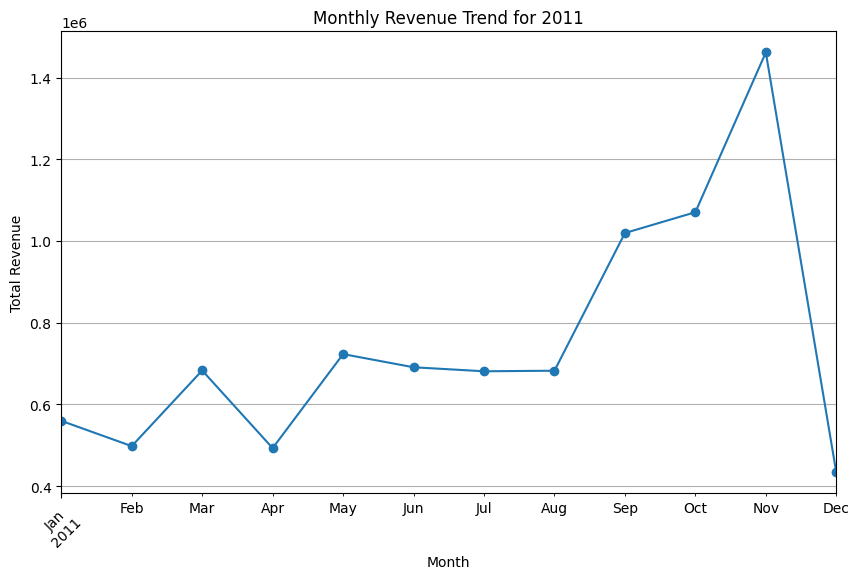

In [27]:
#Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend for 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [28]:
#  Group by Country and calculate the total revenue and quantity for each country
country_grouped = df.groupby('Country').agg({'Revenue': 'sum', 'Quantity': 'sum'}).reset_index()


In [30]:
#  Sort by revenue to get the top 10 countries
top_10_countries = country_grouped.sort_values(by='Revenue', ascending=False).head(10)
top_10_countries

,Country,Revenue,Quantity
36,United Kingdom,8187806.364,4263829
24,Netherlands,284661.540,200128
10,EIRE,263276.820,142637
14,Germany,221698.210,117448
13,France,197403.900,110480
0,Australia,137077.270,83653
33,Switzerland,56385.350,30325
31,Spain,54774.580,26824
3,Belgium,40910.960,23152
32,Sweden,36595.910,35637


In [33]:
# Exclude the United Kingdom (UK)
top_10_countries = top_10_countries[top_10_countries['Country'] != 'United Kingdom']
top_10_countries

,Country,Revenue,Quantity
24,Netherlands,284661.54,200128
10,EIRE,263276.82,142637
14,Germany,221698.21,117448
13,France,197403.90,110480
0,Australia,137077.27,83653
33,Switzerland,56385.35,30325
31,Spain,54774.58,26824
3,Belgium,40910.96,23152
32,Sweden,36595.91,35637


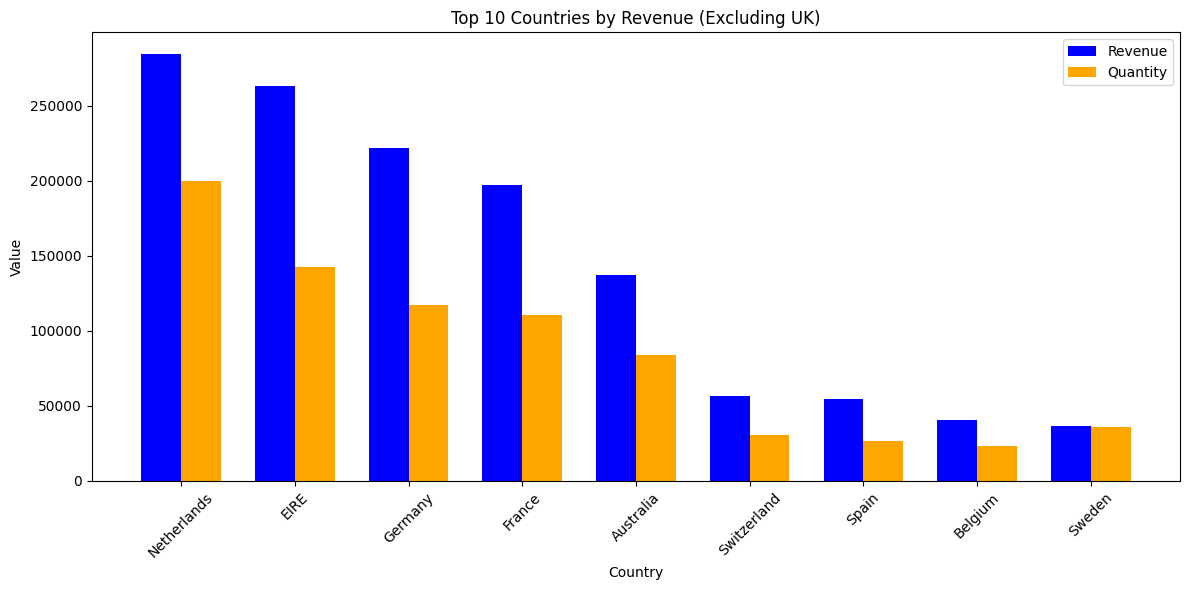

In [34]:
# Set up the bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_10_countries))

# Plot Revenue and Quantity
plt.bar(index, top_10_countries['Revenue'], bar_width, label='Revenue', color='blue')
plt.bar([i + bar_width for i in index], top_10_countries['Quantity'], bar_width, label='Quantity', color='orange')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Top 10 Countries by Revenue (Excluding UK)')
plt.xticks([i + bar_width / 2 for i in index], top_10_countries['Country'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
#  Exclude rows where CustomerID is missing (if any)
df = df[df['CustomerID'].notna()]

In [50]:
#  Group by CustomerID and calculate the total revenue for each customer
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Sort by total revenue in descending order
customer_revenue_sorted = customer_revenue.sort_values(by='Revenue', ascending=False)

#  Select the top 10 customers based on revenue
top_10_customers = customer_revenue_sorted.head(10)


In [40]:
#  Sort by total revenue in descending order
customer_revenue_sorted = customer_revenue.sort_values(by='Revenue', ascending=False)
#view the first 10
customer_revenue_sorted.head(10)


,CustomerID,Revenue
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='CustomerID', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

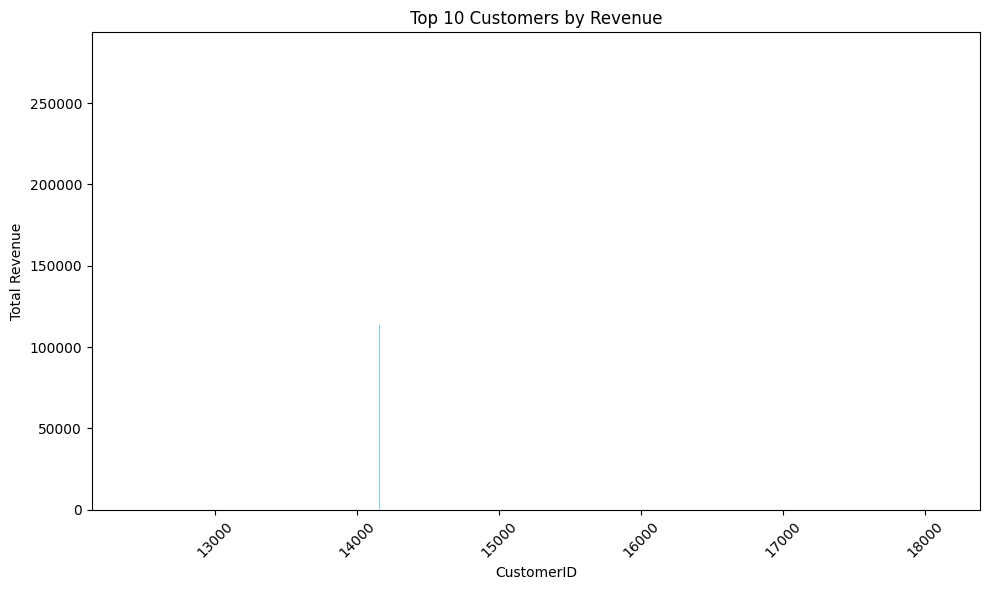

In [51]:
#  Plot the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_customers['CustomerID'], top_10_customers['Revenue'], color='skyblue')

# Add labels and title
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.title('Top 10 Customers by Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
# Group by Country and calculate the total units sold for each country
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()

#  Exclude the United Kingdom (UK)
country_sales = country_sales[country_sales['Country'] != 'UK']

In [49]:
!pip install plotly


In [55]:
# Create the map chart using Plotly
import plotly.express as px
fig = px.choropleth(country_sales,
                    locations="Country",  # Column with country names
                    locationmode="country names",  # Use country names for locations
                    color="Quantity",  # Column with the values to be mapped to color
                    hover_name="Country",  # Display country names when hovering
                    hover_data=["Quantity"],  # Display total units sold on hover
                    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
                    title="Total Units Sold by Country (Excluding UK)")

In [57]:
#  Show the plot
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="whitesmoke")
fig.update_layout(title="Map of Total Units Sold by Country (Excluding UK)",
                  geo=dict(showframe=False, projection_type="natural earth"))

# Display the map
fig.show()